# 1 环境配置

# 2 基本数据处理与计算操作

## 2.1 创建Tensor

In [ ]:
import torch

In [ ]:
x = torch.empty(2, 3)
print(x)

In [ ]:
x = torch.rand(2, 3)
print(x)

In [ ]:
x = torch.zeros(2, 3, dtype=torch.long)
print(x)

In [ ]:
x = torch.tensor([[5.5, 3], [2.2, 5]])
print(x)

In [ ]:
x = x.new_ones(2, 3, dtype=torch.float64)
print(x)

x = torch.randn_like(x, dtype=torch.float)
print(x)

In [ ]:
print(x.size())
print(x.shape)

## 2.2 Tensor的相关操作

In [ ]:
x = torch.rand(2, 3)
y = torch.rand(2, 3)
print(x + y)

print(torch.add(x, y))

y.add_(x)
print(y)

In [ ]:
y = x[0, :]
y += 1
print(y)
print(x[0, :])

In [ ]:
y = x.view(6)
z = x.view(-1, 2)
print(x.size(), y.size(), z.size())

In [ ]:
x += 1
print(x)
print(y)

In [ ]:
x_cp = x.clone().view(6)
x -= 1
print(x)
print(x_cp)

## 2.3 广播机制

In [ ]:
x = torch.arange(1, 3).view(1, 2)
print(x)
y = torch.arange(1, 4).view(3, 1)
print(y)
print(x + y)

## 2.4 Tensor和Numpy相互转换

In [ ]:
a = torch.ones(3)
b = a.numpy()
print(a, b)

a += 1
print(a, b)
b += 1
print(a, b)

In [ ]:
import numpy as np

a = np.ones(3)
b = torch.from_numpy(a)
print(a, b)

a += 1
print(a, b)
b += 1
print(a, b)

In [ ]:
c = torch.tensor(a)
a += 1
print(a, c)

## 2.5 Tensor on GPU

In [ ]:
if torch.cuda.is_available():
    devc = torch.device("cuda")
    y = torch.ones_like(x, device=devc)
    x = x.to(devc)
    z = x + y
    print(z)
    print(z.to("cpu", torch.double))

## 2.6 自动求梯度

In [ ]:
x = torch.ones(2, 2, requires_grad=True)
print(x)
print(x.grad_fn)

In [ ]:
y = x + 2
print(y)
print(y.grad_fn)

In [ ]:
z = y * y * 3
out = z.mean()
print(z)
print(out)

In [ ]:
a = torch.randn(2, 2)
a = (a * 3) / (a - 1)
print(a.requires_grad)
a.requires_grad_(True)
print(a.requires_grad)
b = (a * a).sum()
print(b.grad_fn)

In [ ]:
x = torch.ones(2, 2, requires_grad=True)
y = x + 2
z = y * y * 3
out = z.mean()
out.backward()
print(x.grad)

In [ ]:
out2 = x.sum()
out2.backward()
print(x.grad)

out3 = x.sum()
x.grad.data.zero_()
out3.backward()
print(x.grad)

In [ ]:
x = torch.tensor([1.0, 2.0, 3.0, 4.0], requires_grad=True)
y = 2 * x
z = y.view(2, 2)
print(z)

In [ ]:
v = torch.tensor([[1.0, 0.1], [0.01, 0.001]], dtype=torch.float)
z.backward(v)
print(x.grad)

# 3 线性回归实现

## 3.1 手动实现线性回归

### 导入所需库

In [ ]:
import torch
from IPython import display
from matplotlib import pyplot as plt
import numpy as np
import random

### 生成数据

In [ ]:
num_inputs = 2
num_examples = 1000
true_w = [2, -3.4]
true_b = 4.2
features = torch.tensor(
    np.random.normal(0, 1, (num_examples, num_inputs)), dtype=torch.float
)
labels = true_w[0] * features[:, 0] + true_w[1] * features[:, 1] + true_b
labels += torch.tensor(np.random.normal(0, 0.01, size=labels.size()), dtype=torch.float)

In [ ]:
def use_svg_display():
    display.set_matplotlib_formats("svg")


def set_figsize(figsize=(3.5, 2.5)):
    use_svg_display()
    plt.rcParams["figure.figsize"] = figsize


set_figsize()
plt.scatter(features[:, 1].numpy(), labels.numpy(), 1)

### 读取数据

In [ ]:
num_inputs = 2


# 数据迭代器 iterator
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        j = torch.LongTensor(indices[i : min(i + batch_size, num_examples)])
        yield features.index_select(0, j), labels.index_select(0, j)

### 构建模型

In [ ]:
w = torch.tensor(np.random.normal(0, 0.01, (num_inputs, 1)), dtype=torch.float32)
b = torch.zeros(1, dtype=torch.float32)

In [ ]:
w.requires_grad_(True)
b.requires_grad_(True)

### 前向函数

In [ ]:
def linreg(X, w, b):
    return torch.mm(X, w) + b

### 损失函数

In [ ]:
def squared_loss(y_hat, y):
    return (y_hat - y.view(y_hat.size())) ** 2 / 2

### 优化器

In [ ]:
# stochastic gradient descent (SGD)
# 随机梯度下降
def sgd(params, lr, batch_size):
    for param in params:
        param.data -= lr * param.grad / batch_size

### 模型训练

In [ ]:
lr = 0.03
num_epochs = 128
batch_size = 64
net = linreg
loss = squared_loss
for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y).sum()
        l.backward()
        sgd([w, b], lr, batch_size)
        w.grad.data.zero_()
        b.grad.data.zero_()
    train_1 = loss(net(features, w, b), labels).mean().item()
    print("epoch %d, loss %f" % (epoch + 1, train_1))

In [ ]:
print(true_w, "\n", w)
print(true_b, "\n", b)

## 3.2 利用torchnn实现线性回归

In [ ]:
import torch
import torch.nn as nn

### 读取数据

In [ ]:
lr = 0.03
import torch.utils.data as data

batch_size = 64
dataset = data.TensorDataset(features, labels)

data_iter = data.DataLoader(
    dataset=dataset,
    batch_size=batch_size,
    shuffle=True,  # 打乱数据
    num_workers=0,  # 读取线程数,win下为0
)

### 构建模型(nn.Module)

In [ ]:
class LinearNet(nn.Module):
    def __init__(self, n_features):
        super(LinearNet, self).__init__()
        self.linear = nn.Linear(n_features, 1)

    # forward 定义前向传播
    def forward(self, x):
        y = self.linear(x)
        return y


net = LinearNet(num_inputs)

### 构建模型(其他方法)

In [ ]:
# 使用 nn.Sequential 构建模型
# 写法一
net = nn.Sequential(
    nn.Linear(num_inputs, 1)
    # 此处可以添加其他层
)

# 写法二
# net = nn.Sequential()
# net.add_module('linear',nn.Linear(num_inputs,1))
# net.add_module(...)   # 此处可以添加其他层

# 写法三
# from collections import OrderedDict
# net = nn.Sequential(OrderedDict([
#     ('linear',nn.Linear(num_inputs,1))
#     # 此处可以添加其他层
# ]))

### 模型参数初始化

In [ ]:
from torch.nn import init

init.normal_(net[0].weight, mean=0, std=0.01)
init.constant_(
    net[0].bias, val=0
)  # 也可以直接修改bias的data：net[0].bias.data.fill_(0)
# 上述代码，将参数中的每个元素随机初始化为了均值为0，标准差为0.01的正态分布，
# 同时将偏差初始化为零

### 损失函数和优化器

In [ ]:
# 均方误差作为损失(取了均值，是标量，可以直接.backward())
loss = nn.MSELoss()

In [ ]:
import torch.optim as optim

# stochastic gradient descent
# 随机梯度下降法，学习率为0.03
optimizer = optim.SGD(net.parameters(), lr=0.03)

# 可以为不同的子网络设置不同学习率
# optimizer = optim.SGD(
#     [
#         {"params": net.subnet1.parameters(), "lr": 0.01},
#         {"params": net.subnet2.parameters(), "lr": 0.1},
#         {"params": net.subnet3.parameters(), "lr": 0.05},
#         {"params": net.subnet4.parameters(), "lr": 0.03},
#         {"params": net.subnet5.parameters(), "lr": 0.02},
#     ],
#     lr=0.03,
# )

### 模型训练

In [ ]:
num_epochs = 128
for epoch in range(1, num_epochs + 1):
    for X, y in data_iter:
        output = net(X)
        l = loss(output, y.view(-1, 1))
        optimizer.zero_grad()
        l.backward()
        optimizer.step()
    print(f"Epoch {epoch}, loss: {l.item()}")

In [ ]:
print(true_w, "\n", w)
print(true_b, "\n", b)

## 3.3 常用损失函数

In [ ]:
# 平均绝对误差(MAE): mean absolute error
loss = nn.L1Loss()

# 均方误差(MSE): mean squared error
loss = nn.MSELoss()

# 二元交叉熵损失函数: binary cross-entropy loss
loss = nn.BCELoss()

# 包含sigmoid层的二元交叉熵损失函数: binary cross-entropy loss with sigmoid
loss = nn.BCEWithLogitsLoss()

# 交叉熵损失函数: cross-entropy loss
loss = nn.CrossEntropyLoss()  # 内含softmax运算

## 3.4 模型预测及评价

In [ ]:
def accuracy(y_hat, y):
    return (y_hat.argmax(dim=1) == y).float().mean().item()

In [ ]:
# 评价模型net在数据集data_iter上的准确率
def evaluate_accuracy(data_iter, net):
    acc_sum, n = 0.0, 0
    for X, y in data_iter:
        acc_sum += (net(X).argmax(dim=1) == y).float().sum().item()
        n += y.shape[0]
    return acc_sum / n

# 4 实验

## 4.1 pytorch基本操作考察

### 1

In [1]:
import torch

M = torch.randint(1, 10, (1, 3))
N = torch.randint(1, 10, (2, 1))
print(M)
print(N)
# 法一
R = M - N
print(R)
# 法二
R = torch.sub(M, N)
print(R)
# 法三
R = M.sub(N)
print(R)

tensor([[2, 6, 4]])
tensor([[1],
        [9]])
tensor([[ 1,  5,  3],
        [-7, -3, -5]])
tensor([[ 1,  5,  3],
        [-7, -3, -5]])
tensor([[ 1,  5,  3],
        [-7, -3, -5]])


### 2

In [2]:
import torch

P = torch.normal(mean=0, std=0.01, size=(3, 2))
Q = torch.normal(mean=0, std=0.01, size=(4, 2))
print(P)
print(Q)
QT = Q.t()  # 或者使用 Q.transpose(0, 1)
print(QT)
result = torch.mm(P, QT)  # 或者 P @ QT
print(result)

tensor([[-0.0216,  0.0160],
        [-0.0091,  0.0027],
        [-0.0068,  0.0090]])
tensor([[ 0.0099,  0.0056],
        [-0.0138,  0.0026],
        [-0.0079, -0.0023],
        [ 0.0015,  0.0089]])
tensor([[ 0.0099, -0.0138, -0.0079,  0.0015],
        [ 0.0056,  0.0026, -0.0023,  0.0089]])
tensor([[-1.2499e-04,  3.3890e-04,  1.3386e-04,  1.1123e-04],
        [-7.4840e-05,  1.3241e-04,  6.5485e-05,  1.1275e-05],
        [-1.7940e-05,  1.1763e-04,  3.3561e-05,  7.0087e-05]])


### 3

In [3]:
import torch

x = torch.tensor(1, dtype=float, requires_grad=True)
y1 = x**2
with torch.no_grad():
    y2 = x**3
y3 = y1 + y2
print(y3)
y3.backward()
print(x.grad)

print(y1.grad_fn)
print(y2.grad_fn)
print(y3.grad_fn)

tensor(2., dtype=torch.float64, grad_fn=<AddBackward0>)
tensor(2., dtype=torch.float64)
None


## 4.2 动手实现logistic回归

### 4.2.1 数据生成

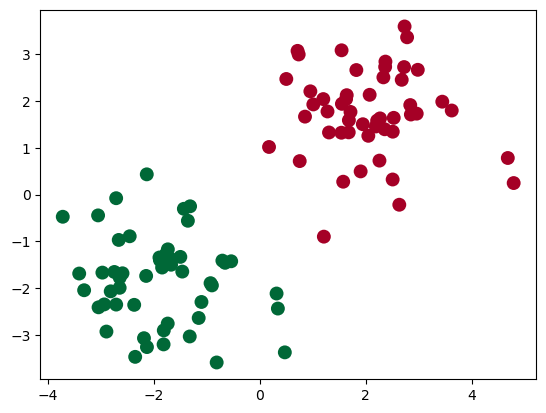

In [4]:
import torch as tc
import matplotlib.pyplot as plt

# CUDA
devc = tc.device("cuda" if tc.cuda.is_available() else "cpu")

n_data = tc.ones(50, 2)
x1 = tc.normal(2 * n_data, 1)
y1 = tc.zeros(50)
x2 = tc.normal(-2 * n_data, 1)
y2 = tc.ones(50)

x = tc.cat((x1, x2), 0).float().to(devc)
y = tc.cat((y1, y2), 0).float().to(devc)

plt.scatter(
    x.detach().cpu().numpy()[:, 0],
    x.detach().cpu().numpy()[:, 1],
    c=y.detach().cpu().numpy(),
    s=100,
    lw=0,
    cmap="RdYlGn",
)
plt.show()

### 4.2.2 手动实现

In [5]:
import torch as tc
import torch.nn as nn

#### 4.2.2.1 数据迭代器

In [6]:
def data_random_iter(batch_size, features, labels):
    num_examples = features.shape[0]
    indices = tc.randperm(num_examples, device=devc)
    for i in range(0, num_examples, batch_size):
        j = indices[i : min(i + batch_size, num_examples)]
        yield features.index_select(0, j), labels.index_select(0, j)


data_iter = data_random_iter

#### 4.2.2.2 模型

In [7]:
w = tc.normal(0, 0.01, size=(x.shape[1], 1), device=devc, requires_grad=True)
b = tc.zeros(1, 1, requires_grad=True, device=devc)


def linear_logits(X, w, b):
    return tc.addmm(b, X, w).squeeze(-1)


net = linear_logits

#### 4.2.2.3 损失函数

In [8]:
loss_BCEwithLogists = nn.BCEWithLogitsLoss()

# TODO 完全手动实现

loss = loss_BCEwithLogists

#### 4.2.2.4 优化器

In [9]:
def optim_sgd(params, lr):
    for param in params:
        param.data -= lr * param.grad
        # 若loss计算采用sum而非mean，则需要除以batch_size
        param.grad.zero_()


optimizer = optim_sgd

#### 4.2.2.5 准确度函数

In [10]:
def accuracy_binary_classification(x, y, w, b, net):
    with tc.no_grad():
        y_hat = net(x, w, b)
        prob = tc.sigmoid(y_hat)
        acc = ((prob > 0.5) == y).float().mean().item()
    return acc


evaluate_accuracy = accuracy_binary_classification

#### 4.2.2.6 训练函数

In [11]:
def train(x, y, w, b, lr, batch_size, epochs):
    for epoch in range(epochs):
        epoch_loss = 0
        for x_batch, y_batch in data_iter(batch_size, x, y):
            y_hat = net(x_batch, w, b)
            los = loss(y_hat, y_batch)
            los.backward()
            optimizer([w, b], lr)
            epoch_loss += los.detach().item() / len(x_batch)
        print(f"Epoch {epoch + 1}, Loss {los.item()}")
    return w, b

#### 4.2.2.7 训练过程

In [12]:
lr = 0.03
batch_size = 32
epochs = 1024

w, b = train(x, y, w, b, lr, batch_size, epochs)
accuracy = evaluate_accuracy(x, y, w, b, net)
print(f"Accuracy: {accuracy}")

Epoch 1, Loss 0.5701874494552612
Epoch 2, Loss 0.4653240442276001
Epoch 3, Loss 0.3506408929824829
Epoch 4, Loss 0.21984648704528809
Epoch 5, Loss 0.30377811193466187
Epoch 6, Loss 0.3133988678455353
Epoch 7, Loss 0.23612695932388306
Epoch 8, Loss 0.16717153787612915
Epoch 9, Loss 0.193592369556427
Epoch 10, Loss 0.15219642221927643
Epoch 11, Loss 0.14364659786224365
Epoch 12, Loss 0.18308517336845398
Epoch 13, Loss 0.2624778747558594
Epoch 14, Loss 0.1303437203168869
Epoch 15, Loss 0.08003784716129303
Epoch 16, Loss 0.22503776848316193
Epoch 17, Loss 0.11990689486265182
Epoch 18, Loss 0.12364864349365234
Epoch 19, Loss 0.06548137217760086
Epoch 20, Loss 0.19326171278953552
Epoch 21, Loss 0.15273664891719818
Epoch 22, Loss 0.07257762551307678
Epoch 23, Loss 0.06537964195013046
Epoch 24, Loss 0.05665203183889389
Epoch 25, Loss 0.11104270815849304
Epoch 26, Loss 0.09361091256141663
Epoch 27, Loss 0.11162805557250977
Epoch 28, Loss 0.07503674179315567
Epoch 29, Loss 0.09211188554763794
Ep

### 4.2.3 torch.nn实现

In [13]:
import torch as tc
import torch.nn as nn
from torch.nn import init
import torch.optim as optim
import torch.utils.data as tata

#### 4.2.3.1 数据迭代器

In [14]:
def get_data_iter(x, y, batch_size):
    dataset = tata.TensorDataset(x, y)
    return tata.DataLoader(dataset=dataset, batch_size=batch_size, shuffle=True)

#### 4.2.3.2 模型

In [15]:
class LinearNet(nn.Module):
    def __init__(self, n_features):
        super(LinearNet, self).__init__()
        self.linear = nn.Linear(n_features, 1)

    def forward(self, x):
        return self.linear(x).squeeze(-1)


def get_net(n_features, device):
    net = LinearNet(n_features).to(device)
    init.normal_(net.linear.weight, mean=0, std=0.01)
    init.constant_(net.linear.bias, val=0)
    return net

#### 4.2.3.3 损失函数

In [16]:
loss_fn = nn.BCEWithLogitsLoss()

#### 4.2.3.4 优化器

In [17]:
def get_optimizer(net, lr):
    return optim.SGD(net.parameters(), lr=lr)

#### 4.2.3.5 准确度函数

In [18]:
def evaluate_accuracy(data_iter, net, device):
    acc_sum, n = 0.0, 0
    net.eval()
    with tc.no_grad():
        for X, y in data_iter:
            X, y = X.to(device), y.to(device)
            y_hat = net(X)
            acc_sum += ((y_hat > 0) == y).float().sum().item()
            n += y.shape[0]
    net.train()
    return acc_sum / n

#### 4.2.3.6 训练函数

In [19]:
def train(net, data_iter, loss_fn, optimizer, epochs, device):
    net.train()
    for epoch in range(epochs):
        for X, y in data_iter:
            X, y = X.to(device), y.to(device)
            y_hat = net(X)
            l = loss_fn(y_hat, y)
            optimizer.zero_grad()
            l.backward()
            optimizer.step()
        print(f"Epoch {epoch + 1}, Loss {l.item()}")

#### 4.2.3.7 训练过程

In [20]:
lr = 0.03
batch_size = 32
epochs = 1024

# 创建组件
data_iter = get_data_iter(x, y, batch_size)
net = get_net(x.shape[1], devc)
loss = loss_fn
optimizer = get_optimizer(net, lr)

# 训练
train(net, data_iter, loss, optimizer, epochs, devc)

# 评估
acc = evaluate_accuracy(data_iter, net, devc)
print(f"Accuracy: {acc}")

Epoch 1, Loss 0.5394961833953857
Epoch 2, Loss 0.392752468585968
Epoch 3, Loss 0.35866886377334595
Epoch 4, Loss 0.2718009352684021
Epoch 5, Loss 0.18670117855072021
Epoch 6, Loss 0.20154190063476562
Epoch 7, Loss 0.17961320281028748
Epoch 8, Loss 0.28898942470550537
Epoch 9, Loss 0.1603642702102661
Epoch 10, Loss 0.12231317907571793
Epoch 11, Loss 0.12900826334953308
Epoch 12, Loss 0.10216662287712097
Epoch 13, Loss 0.09901571273803711
Epoch 14, Loss 0.07480470836162567
Epoch 15, Loss 0.12898972630500793
Epoch 16, Loss 0.08545215427875519
Epoch 17, Loss 0.06474730372428894
Epoch 18, Loss 0.06883120536804199
Epoch 19, Loss 0.07423234730958939
Epoch 20, Loss 0.13207437098026276
Epoch 21, Loss 0.09949760138988495
Epoch 22, Loss 0.20406289398670197
Epoch 23, Loss 0.03322776407003403
Epoch 24, Loss 0.05950086563825607
Epoch 25, Loss 0.033172909170389175
Epoch 26, Loss 0.03098142333328724
Epoch 27, Loss 0.03555150330066681
Epoch 28, Loss 0.08872837573289871
Epoch 29, Loss 0.1222111135721206

## 4.3 动手实现softmax回归

### 4.3.1 获取数据

In [21]:
import torch as tc
import torchvision as tcvs
import torch.utils.data as tata
import torchvision.transforms as trans

devc = tc.device("cuda" if tc.cuda.is_available() else "cpu")

In [22]:
mnist_train = tcvs.datasets.FashionMNIST(
    root="Datasets",
    train=True,
    download=False,
    transform=trans.ToTensor(),
)
mnist_test = tcvs.datasets.FashionMNIST(
    root="Datasets",
    train=False,
    download=False,
    transform=trans.ToTensor(),
)

In [23]:
def train_iter(batch_size=1):
    return tata.DataLoader(
        dataset=mnist_train,
        batch_size=batch_size,
        shuffle=True,
        num_workers=4,
        pin_memory=True,
    )


def test_iter(batch_size=1):
    return tata.DataLoader(
        dataset=mnist_test,
        batch_size=batch_size,
        shuffle=False,
        num_workers=4,
        pin_memory=True,
    )

### 4.3.2 手动实现

#### 4.3.2.1 构建模型

In [24]:
w = tc.normal(mean=0, std=0.1, size=(784, 10), requires_grad=True, device=devc)
b = tc.zeros(size=(1, 10), requires_grad=True, device=devc)


def net(x, w, b):
    x = x.view(-1, w.shape[0])
    return x @ w + b

#### 4.3.2.2 定义损失函数

In [25]:
def cross_entropy(y_hat, y):
    # 先log后softmax ，则yk = zk - log(∑e^z_i)
    log_probs = y_hat - y_hat.logsumexp(dim=1, keepdim=True)
    loss = -log_probs[tc.arange(y_hat.size(0)), y].mean()
    return loss


def loss(y_hat, y):
    return cross_entropy(y_hat, y)

#### 4.3.2.3 优化器

In [26]:
def optim_SGD(params, lr):
    with tc.no_grad():
        for param in params:
            param.data -= lr * param.grad
            param.grad.zero_()


def optimizer(params, lr):
    optim_SGD(params, lr)

#### 4.3.2.4 计算准确率

In [27]:
def accuracy(y_hat, y):
    # 对多分类 logits，取预测类别
    if y_hat.shape[1] > 1:
        y_hat = y_hat.argmax(dim=1)
    cmp = y_hat == y
    return float(cmp.float().mean())

def eval_accuracy(w, b, data_loader, device):
    correct = 0
    total = 0

    for X, y in data_loader:
        X, y = X.to(device), y.to(device)

        # 前向计算
        X = X.view(X.size(0), -1)
        logits = X @ w + b
        preds = logits.argmax(dim=1)

        correct += (preds == y).sum().item()
        total += y.size(0)

    return correct / total



#### 4.3.2.5 训练函数

In [28]:
def train(w, b, lr, num_epochs, batch_size):
    for epoch in range(num_epochs):
        train_los = 0
        train_acc = 0
        batch_num = 0
        total_num = 0
        for x_batch, y_batch in train_iter(batch_size=batch_size):
            x_batch, y_batch = x_batch.to(devc, non_blocking=True), y_batch.to(
                devc, non_blocking=True
            )
            y_hat = net(x_batch, w, b)
            los = loss(y_hat, y_batch)
            los.backward()
            with tc.no_grad():
                optimizer([w, b], lr)
                batch_num = y_batch.shape[0]
                total_num += batch_num
                train_los += los.item() * batch_num
                train_acc += accuracy(y_hat, y_batch) * batch_num
        with tc.no_grad():
            train_los /= total_num
            train_acc /= total_num
        print(f"epoch {epoch + 1}, loss {train_los:f}, acc {train_acc:f}")
    return (w, b)

#### 4.3.2.6 训练过程

In [29]:
num_epochs = 64
batch_size = 1024
lr = 0.3

(w, b) = train(w, b, lr, num_epochs, batch_size)

test_loader = test_iter()
test_acc = eval_accuracy(w, b, test_loader, devc)
print("test accuracy:", test_acc)


epoch 1, loss 1.441300, acc 0.627733
epoch 2, loss 0.913126, acc 0.741217
epoch 3, loss 0.782802, acc 0.768017
epoch 4, loss 0.718618, acc 0.779850
epoch 5, loss 0.639944, acc 0.797117
epoch 6, loss 0.659360, acc 0.794283
epoch 7, loss 0.637274, acc 0.800867
epoch 8, loss 0.591933, acc 0.812450
epoch 9, loss 0.593499, acc 0.812167
epoch 10, loss 0.603703, acc 0.807883
epoch 11, loss 0.596484, acc 0.812933
epoch 12, loss 0.588732, acc 0.814650
epoch 13, loss 0.565571, acc 0.819600
epoch 14, loss 0.558985, acc 0.817917
epoch 15, loss 0.541931, acc 0.824650
epoch 16, loss 0.541866, acc 0.826167
epoch 17, loss 0.552479, acc 0.823383
epoch 18, loss 0.537618, acc 0.827000
epoch 19, loss 0.525521, acc 0.829817
epoch 20, loss 0.549776, acc 0.824833
epoch 21, loss 0.533722, acc 0.829717
epoch 22, loss 0.537663, acc 0.825733
epoch 23, loss 0.521984, acc 0.830317
epoch 24, loss 0.504845, acc 0.834917
epoch 25, loss 0.511579, acc 0.833217
epoch 26, loss 0.518940, acc 0.830633
epoch 27, loss 0.5084

### 4.3.3 torchrch.nn实现

In [30]:
import torch as tc
import torch.nn as nn
import torch.nn.init as init
import torchvision as tcvs
import torch.optim as optim
import torch.utils.data as tata

#### 4.3.3.1 构建模型

In [31]:
class SoftmaxNet(nn.Module):
    def __init__(self, input_dim=784, num_classes=10):
        super().__init__()
        self.linear = nn.Linear(input_dim, num_classes)  # 相当于 y = XW + b

    def forward(self, x):
        x = x.view(x.size(0), -1)  # 展平为 (batch_size, 784)
        return self.linear(x)


def get_net():
    net = SoftmaxNet().to(devc)
    init.normal_(net.linear.weight, mean=0, std=0.01)
    init.constant_(net.linear.bias, val=0)
    return net

#### 4.3.3.2 损失函数

In [32]:
def get_loss():
    return nn.CrossEntropyLoss()

#### 4.3.3.3 优化器

In [33]:
def get_optimizer(net, lr):
    return optim.SGD(params=net.parameters(), lr=lr)

#### 4.3.3.4 准确度

In [34]:
def accuracy(y_hat, y):
    preds = y_hat.argmax(dim=1)
    return (preds == y).float().mean().item()

def eval_accuracy(model, data_loader, device):
    model.eval()     # 进入 eval 模式（关闭 dropout/bn）
    correct = 0
    total = 0

    with torch.no_grad():
        for X, y in data_loader:
            X, y = X.to(device), y.to(device)

            logits = model(X)
            preds = logits.argmax(dim=1)

            correct += (preds == y).sum().item()
            total += y.size(0)

    model.train()    # 用完恢复 train 模式
    return correct / total



#### 4.3.3.5 训练函数

In [35]:
def train(num_epoches=64, batch_size=32):
    net.train()
    for epoch in range(num_epoches):
        train_los = 0
        train_acc = 0
        batch_num = 0
        total_num = 0
        for x_batch, y_batch in train_iter(batch_size=batch_size):
            x_batch, y_batch = x_batch.to(devc), y_batch.to(devc)
            y_hat = net(x_batch)
            los = loss(y_hat, y_batch)
            los.backward()
            with tc.no_grad():
                optimizer.step()
                optimizer.zero_grad()
                batch_num = y_batch.shape[0]
                total_num += batch_num
                train_los += los.item() * batch_num
                train_acc += accuracy(y_hat, y_batch) * batch_num
        print(f"Epoch: {epoch+1}, Loss: {train_los / total_num}, Acc: {train_acc / total_num}")

#### 4.3.3.6 训练过程

In [36]:
num_epochs = 64
batch_size = 1024
lr = 0.3

net = get_net()
loss = get_loss()
optimizer = get_optimizer(net, lr)

train(num_epochs, batch_size)

test_loader = test_iter()
test_acc = eval_accuracy(net, test_loader, devc)
print("test accuracy:", test_acc)


Epoch: 1, Loss: 1.373246579837799, Acc: 0.6462333333969116
Epoch: 2, Loss: 0.8753124982198079, Acc: 0.7534666666030884
Epoch: 3, Loss: 0.7866150128046672, Acc: 0.7727833331425985
Epoch: 4, Loss: 0.7033290469169616, Acc: 0.7872166669845581
Epoch: 5, Loss: 0.6817568596522013, Acc: 0.7901166666030883
Epoch: 6, Loss: 0.6247742014249166, Acc: 0.8047166667620341
Epoch: 7, Loss: 0.6345904666900635, Acc: 0.8045333336512248
Epoch: 8, Loss: 0.5882470145225525, Acc: 0.8114499998092651
Epoch: 9, Loss: 0.5962523861249288, Acc: 0.8114999999364217
Epoch: 10, Loss: 0.6018470810890197, Acc: 0.8103333336194356
Epoch: 11, Loss: 0.5712823287963867, Acc: 0.8183833335240682
Epoch: 12, Loss: 0.5890312889099121, Acc: 0.8141166668256123
Epoch: 13, Loss: 0.5606844895680746, Acc: 0.820650000222524
Epoch: 14, Loss: 0.5411496306101481, Acc: 0.824583333683014
Epoch: 15, Loss: 0.5710336059570312, Acc: 0.8177333334604899
Epoch: 16, Loss: 0.5407737658818563, Acc: 0.8265833332061767
Epoch: 17, Loss: 0.5375505518913269,